In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class maxout(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, hidden_dim)
        self.dropout = nn.Dropout(0.4)
        
    def forward(self, src):
        src = self.dropout(src)
        output = self.linear(src)
        output, input_indexes = torch.max(output, dim = 1)
        return output

In [12]:
model = maxout(1, 3)
loss = nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), lr = 0.001)

In [24]:
for i in range(10000):
    optim.zero_grad()
    x = torch.FloatTensor(1000, 1).uniform_(-30, 30)
    y = x ** 2
    lv = loss(model(x), y.view(-1))
    if i % 1000 == 0:
        print(str(i), lv, end = "\r")
        model.eval()
        with torch.no_grad():
            print(model(torch.Tensor([[0],[1],[2]])), end = "\r")
    lv.backward()
    optim.step()

/home/jack/anaconda3/envs/cuda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  This is separate from the ipykernel package so we can avoid doing imports until


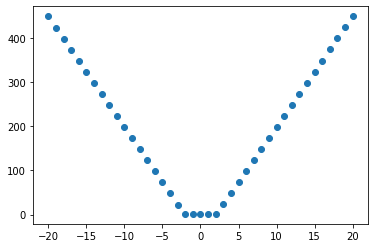

In [28]:
model.eval()
with torch.no_grad():
    xx = torch.range(-20, 20, 1)
    y = model(xx.unsqueeze(1))
    plt.scatter(xx, y.data)

In [58]:
model.eval()
with torch.no_grad():
    print(model(torch.Tensor([[0],[1],[2]])))

tensor([-0.0000, 1.9944, 3.9888])


In [19]:
class Maxout(nn.Module):

    def __init__(self, d_in, d_out, pool_size):
        super().__init__()
        self.d_in, self.d_out, self.pool_size = d_in, d_out, pool_size
        self.lin = nn.Linear(d_in, d_out * pool_size)


    def forward(self, inputs):
        shape = list(inputs.size())
        shape[-1] = self.d_out
        shape.append(self.pool_size)
        max_dim = len(shape) - 1
        out = self.lin(inputs)
        m, i = out.view(*shape).max(max_dim)
        return m

In [20]:
model = Maxout(1, 1, 5)
loss = nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), lr = 0.001)

In [21]:
for i in range(100000):
    optim.zero_grad()
    x = torch.FloatTensor(1000, 1).uniform_(-30, 30)
    y = x ** 2
    lv = loss(model(x), y)
    if i % 10000 == 0:
        model.eval()
        with torch.no_grad():
            log = model(torch.Tensor([[0],[1],[2]])).tolist()
            log = f"{log[0][0]:.4f}, {log[1][0]:.4f}, {log[2][0]:.4f}"
            print(str(i), lv, log)
    lv.backward()
    optim.step()

0 tensor(149132.4062, grad_fn=<MseLossBackward>) 0.5370, 0.9954, 1.7571
10000 tensor(51805.0234, grad_fn=<MseLossBackward>) 9.3404, 19.6124, 30.0540
20000 tensor(14399.4082, grad_fn=<MseLossBackward>) 16.7529, 35.2854, 54.3261
30000 tensor(10709.5811, grad_fn=<MseLossBackward>) 6.7373, 28.0592, 50.2347
40000 tensor(9411.3984, grad_fn=<MseLossBackward>) -0.0024, 18.6916, 41.3707
50000 tensor(9079.1377, grad_fn=<MseLossBackward>) -0.0448, 9.3239, 32.4948
60000 tensor(8407.7627, grad_fn=<MseLossBackward>) -0.1568, 0.8558, 23.6369
70000 tensor(7895.5571, grad_fn=<MseLossBackward>) 0.0712, 1.0787, 14.7240
80000 tensor(7465.4453, grad_fn=<MseLossBackward>) 0.1244, 1.0628, 5.8708
90000 tensor(7129.7759, grad_fn=<MseLossBackward>) 0.1836, 0.9261, 3.9685


/home/jack/anaconda3/envs/cuda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  This is separate from the ipykernel package so we can avoid doing imports until


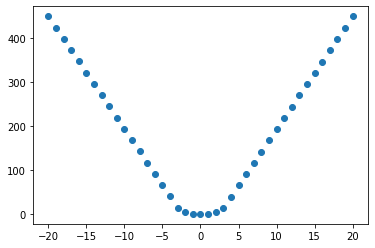

In [22]:
model.eval()
with torch.no_grad():
    xx = torch.range(-20, 20, 1)
    y = model(xx.unsqueeze(1))
    plt.scatter(xx, y.data)

In [19]:
model.eval()
with torch.no_grad():
    print(model(torch.Tensor([[1.2],[10],[9]])), end = "\r")

tensor([[ 11.9710],
        [108.0612],
